In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# Introduction to Machine Learning
## Live demos

In [3]:
diabetes_data = pd.read_csv("data/diabetic_data.csv", na_values= ["?"])

C:\Users\HP\AppData\Local\Temp\ipykernel_14076\2183363408.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  diabetes_data = pd.read_csv("data/diabetic_data.csv", na_values= ["?"])


In [4]:
diabetes_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
diabetes_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

На
https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008
има метаданни за dataset-a

In [6]:
diabetes_data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

Задачата е - какви са характеристиките, които водят до повторно приемане или неприемане в болница. Кои терапии работят по-добре от други.

почваме да гледаме target променливата какво представлява

In [7]:
diabetes_data.readmitted.unique()

array(['NO', '>30', '<30'], dtype=object)

diabetes_data.readmitted.value_counts()

класификация - значи ни трябват алгоритми класификатори

race, gender трябва да са категорийни 

In [8]:
diabetes_data.race.value_counts()

race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

Тъй като имаме данни, дето не знам какви, затова ще направим такива NaN

In [9]:
diabetes_data.race.value_counts(dropna=False)

race
Caucasian          76099
AfricanAmerican    19210
NaN                 2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [10]:
diabetes_data.gender.value_counts(dropna=False)

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

In [11]:
diabetes_data.age.value_counts(dropna=False)

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

Нормализираме данните и гледаме проценти.

In [12]:
diabetes_data.age.value_counts(dropna=False) / len(diabetes_data) * 100

age
[70-80)     25.615628
[60-70)     22.092840
[50-60)     16.956547
[80-90)     16.898571
[40-50)      9.516931
[30-40)      3.709490
[90-100)     2.744532
[20-30)      1.628245
[10-20)      0.679009
[0-10)       0.158206
Name: count, dtype: float64

Друг проблем - discharge disposition има много стойности.

In [13]:
diabetes_data.discharge_disposition_id.value_counts(dropna=False)

discharge_disposition_id
1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: count, dtype: int64

ако искаме по-груба класификация, можем да обединим няколко в едно. Най-лесното е да си затворим очите за това. Ние и това ше направим за да пуснем някакъв модел. 
Имаме категории с малко на брой записи. Дали не е добре да ги обединим за да получим категории с малко нива. Ниво на категорията наричаме уникални стойности в нея. 
Поглеждаме едно от лекарствата, което също очакваме да е категорийни променливи.

In [14]:
diabetes_data.metformin.value_counts(dropna=False)

metformin
No        81778
Steady    18346
Up         1067
Down        575
Name: count, dtype: int64

Естествено голяма част от записите ще бъдат NO. Но това което ни успокоява е, че временно може да третираме текстовите променливи като категорийни.
Не бихме оставили и patientId.

In [15]:
diabetes_data.patient_nbr 

0           8222157
1          55629189
2          86047875
3          82442376
4          42519267
            ...    
101761    100162476
101762     74694222
101763     41088789
101764     31693671
101765    175429310
Name: patient_nbr, Length: 101766, dtype: int64

Това са числа, обаче не могат да бъдат събирани, така че според нашето разбиране са категорийни променливи.
Нека видим пациентите:


In [16]:
diabetes_data.patient_nbr.value_counts()

patient_nbr
88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: count, Length: 71518, dtype: int64

Имаме много пациенти с 1 посещение, 1 с 40. Нека да го видим...Той заслужава да му направим timeline. Но първо хистограма

<Axes: >

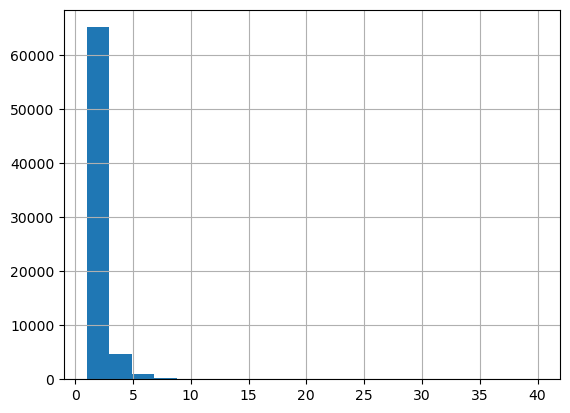

In [17]:
diabetes_data.patient_nbr.value_counts().hist(bins = 20)

In [18]:
diabetes_data[diabetes_data.patient_nbr == 88785891].sort_values("encounter_id")

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
38307,119039172,88785891,Caucasian,Female,[20-30),NaN,1,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,>30
40252,125094312,88785891,Caucasian,Female,[20-30),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,<30
40661,126171582,88785891,Caucasian,Female,[20-30),NaN,1,1,7,5,...,No,Up,No,No,No,No,No,Ch,Yes,>30
44515,137245596,88785891,Caucasian,Female,[20-30),NaN,3,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,<30
45147,139425576,88785891,Caucasian,Female,[20-30),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,<30
45986,141994242,88785891,Caucasian,Female,[20-30),NaN,2,1,7,4,...,No,Up,No,No,No,No,No,Ch,Yes,<30
50167,150986298,88785891,Caucasian,Female,[20-30),NaN,2,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,<30
50393,151413846,88785891,Caucasian,Female,[20-30),NaN,1,1,7,4,...,No,Up,No,No,No,No,No,Ch,Yes,<30
50773,152188656,88785891,Caucasian,Female,[20-30),NaN,2,7,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,<30
51519,153558456,88785891,Caucasian,Female,[20-30),NaN,2,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,<30


Взимаме стойностите на инсулин за тази пациентка

In [19]:
diabetes_data[diabetes_data.patient_nbr == 88785891].sort_values("encounter_id").insulin

38307       Up
40252     Down
40661       Up
44515       Up
45147       Up
45986       Up
50167       Up
50393       Up
50773       Up
51519       Up
52057       Up
53771     Down
54497     Down
60263       Up
62759       Up
63165     Down
65667       Up
67968     Down
71029       Up
72068     Down
74405       Up
74876     Down
75267     Down
76525       Up
76907     Down
78355       Up
78882       Up
79202       Up
79467       Up
82693     Down
87063     Down
87854       Up
88392       Up
89964     Down
90913       Up
91444       Up
97433     Down
97732       Up
99950       Up
101385      No
Name: insulin, dtype: object

In [20]:
diabetes_data[diabetes_data.patient_nbr == 88785891].sort_values("encounter_id").readmitted.value_counts() #Виждаме къде е приета

readmitted
<30    23
>30    17
Name: count, dtype: int64

За този пациент имаме данни, ама за много други нямаме толкова данни. Така че encounter_id не ни върши работа, patient_Number не ни върши работа...Това са променливи с твърде голяма ентропия. Максимална ентропия означава всичко е различно и не ни върши работа.

Да вземем да си отделим таргет. Тъй като за момента искаме да използваме стандартни теермини, нека използваме attributes - това са данните без "readmitted"

In [21]:
attributes = diabetes_data.drop(columns = "readmitted")

In [22]:
target = diabetes_data.readmitted

In [23]:
attributes.shape

(101766, 49)

Почваме да поразкарваме колони и се обосноваваме защо сме ги разкарали.

In [24]:
attributes = attributes.drop(columns = ["encounter_id", "patient_nbr"])

Анализираме diag1, diag2, diag3. 

Нямаме пациент, на който нищо не му липсва. Много хора им липсва тегло.

In [25]:
attributes[attributes.weight.isna()]

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,No,Up,No,No,No,No,No,Ch,Yes


С какво да го заменим - с медиана, с модел? Изчезва заради много на брой липсващи стойности. Дали е записано теглото е характеристика на доктора, не на пациента.

In [26]:
attributes = attributes.drop(columns = ["weight"])

In [27]:
attributes = attributes.drop(columns = ["payer_code", "medical_specialty"])

In [28]:
attributes.dropna()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
162,Caucasian,Male,[80-90),6,3,7,5,47,1,6,...,No,No,No,No,No,No,No,No,No,No
460,AfricanAmerican,Female,[70-80),6,1,7,10,72,1,19,...,No,No,Up,No,No,No,No,No,Ch,Yes
593,Caucasian,Female,[50-60),6,1,7,2,61,0,5,...,No,No,Steady,No,No,No,No,No,No,Yes
696,Other,Male,[70-80),6,6,7,11,71,1,20,...,No,No,No,No,No,No,No,No,No,Yes
771,Caucasian,Female,[30-40),6,1,2,14,43,0,11,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100386,Caucasian,Male,[60-70),2,1,1,6,51,0,20,...,No,No,No,No,No,No,No,No,No,Yes
100493,Caucasian,Female,[40-50),1,1,7,3,78,0,8,...,No,No,No,No,No,No,No,No,No,No
100578,Caucasian,Female,[60-70),1,2,7,4,90,0,25,...,No,No,No,No,No,No,No,No,No,No
101029,Caucasian,Male,[50-60),1,1,7,7,72,0,16,...,No,No,No,No,No,No,No,No,Ch,Yes


Останаха някакви данни....нека да видим time in hospital, брой на взиманите лекарства

<Axes: >

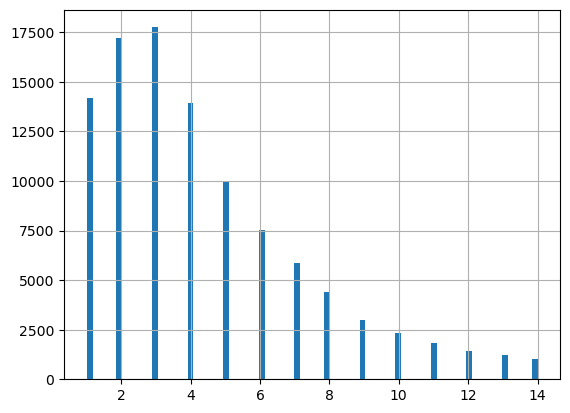

In [29]:
diabetes_data.time_in_hospital.hist(bins = "fd")

<Axes: >

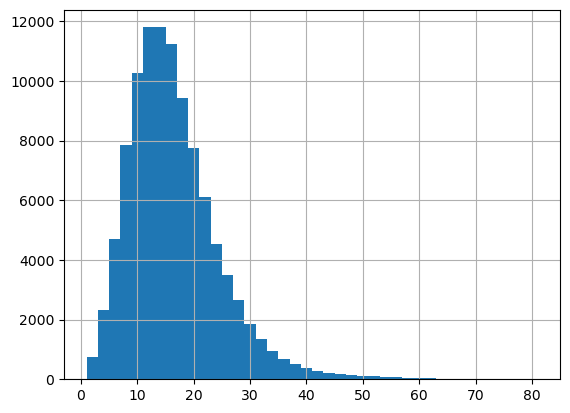

In [30]:
diabetes_data.num_medications.hist(bins = 40)

Понякога интервала може да е в порядъци

Самите стойности от 0 до 80 също са проблемни, защото като работим с числа, нашите алгоритми работят с 4-те операции, матрични операции...и нашите числа не се запазват точно в паметта и получаваме числови грешки. 

In [31]:
1000000000000000000000.0 + 1 == 1000000000000000000000.0

True

Тези грешки са най-малки, когато числата между 0 и 1 и -1. Затова е най-добра на нашия модел да даваме числа близки до 0. Затова се налага да скалираме данните. Имаме различни начини например със Z-Score. Ето как се прави. Правим и хистограма

<Axes: >

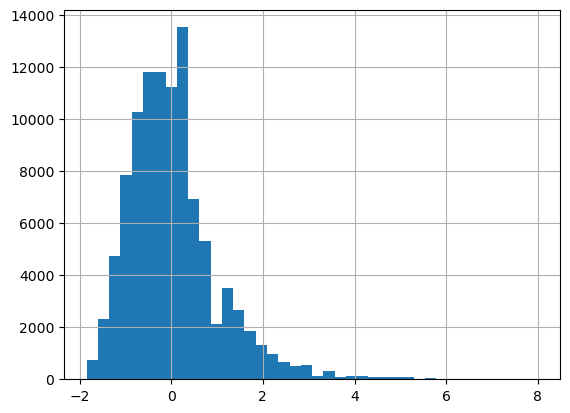

In [32]:
#Z-Score scaling
((diabetes_data.num_medications - diabetes_data.num_medications.mean()) / diabetes_data.num_medications.std()).hist(bins = 40)

Имаме -2 стандартни отклонение от средното.

Друг начин за нормализация е да изкарам минималното и да разделя на range-a.

<Axes: >

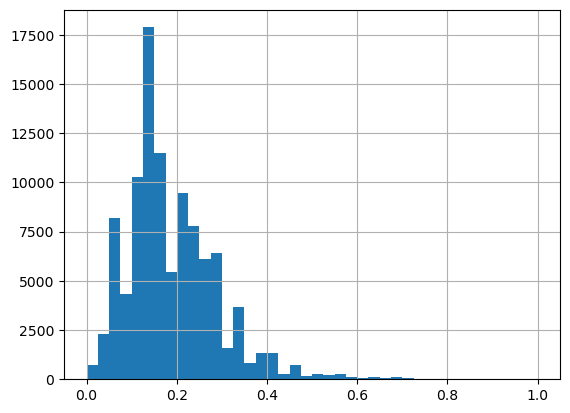

In [33]:
#Min-max scaling
((diabetes_data["num_medications"] - diabetes_data["num_medications"].min()) / (diabetes_data["num_medications"].max() - diabetes_data["num_medications"].min())).hist(bins = 40)

Разпределението е съвсем същото като оргиналното, само че този път е между 0 и 1. 

Прилагаме скалирането. 

Въпросът с категорийните променливи е по-фин и по-неясен. Например метформин - категорийна променлива с някакви брой стойности.
Нека направим :

In [34]:
pd.get_dummies(diabetes_data.metformin)

,Down,No,Steady,Up
0,False,True,False,False
1,False,True,False,False
2,False,True,False,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
101761,False,False,True,False
101762,False,True,False,False
101763,False,False,True,False
101764,False,True,False,False


Това което се получава, че всяка една отделна стойност става колона - много подобно на unpivot от Data Science. За какво ми е това?


In [35]:
pd.get_dummies(diabetes_data.metformin).astype(int)

,Down,No,Steady,Up
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
101761,0,0,1,0
101762,0,1,0,0
101763,0,0,1,0
101764,0,1,0,0


Може да направим down = - 1, steady = 0, up = + 1. No = -99. Тоест едни и същи данни можем да кодираме по различен начин. Енкодинг е представяне на данните. В случая категорията е подредена, ама иначе пак е ок. Не можем да имаме модел, който приема стрингове. 


Има 3 начина да представим категорийни променливи :

1. indicator variables - one-hot encoding - щото единицата е там, където е интересно. Защо се прави - един запис може да има повече от 1 категории. Защо се прави - защото така всяка една категории остава независими от другите. С една map функция 

In [36]:
attributes.metformin.replace({'No' : -99,'Down' : -1 , 'Steady': 0 , 'Up': 1})

0        -99
1        -99
2        -99
3        -99
4        -99
          ..
101761     0
101762   -99
101763     0
101764   -99
101765   -99
Name: metformin, Length: 101766, dtype: int64

Правим същото с възраст, с пол, с цвят - ненаредена ...когато види числа, модела започва да ги събира изважда дели, умножава.

Та едно от най-важните решения е дали да се направи за целия Dataset.

In [37]:
pd.get_dummies(attributes)

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,6,25,1,1,41,0,1,0,0,0,...,True,False,True,False,True,False,False,True,True,False
1,1,1,7,3,59,0,18,0,0,0,...,True,False,True,False,True,False,True,False,False,True
2,1,1,7,2,11,5,13,2,0,1,...,True,False,True,False,True,False,False,True,False,True
3,1,1,7,2,44,1,16,0,0,0,...,True,False,True,False,True,False,True,False,False,True
4,1,1,7,1,51,0,8,0,0,0,...,True,False,True,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,3,7,3,51,0,16,0,0,0,...,True,False,True,False,True,False,True,False,False,True
101762,1,4,5,5,33,3,18,0,0,1,...,True,False,True,False,True,False,False,True,False,True
101763,1,1,7,1,53,0,9,1,0,0,...,True,False,True,False,True,False,True,False,False,True
101764,2,3,7,10,45,2,21,0,0,1,...,True,False,True,False,True,False,True,False,False,True


Ето колоните станаха 2363. Ще направим и drop_first = true, щото ако знаем 3-те колони, 4-тата е излишна. Ще се махнат към 30 колони

In [38]:
attributes = pd.get_dummies(attributes, drop_first=True)

In [39]:
attributes

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,6,25,1,1,41,0,1,0,0,0,...,False,True,False,False,False,False,False,False,True,False
1,1,1,7,3,59,0,18,0,0,0,...,True,True,False,False,False,False,False,False,False,True
2,1,1,7,2,11,5,13,2,0,1,...,False,True,False,False,False,False,False,False,True,True
3,1,1,7,2,44,1,16,0,0,0,...,True,True,False,False,False,False,False,False,False,True
4,1,1,7,1,51,0,8,0,0,0,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,3,7,3,51,0,16,0,0,0,...,False,True,False,False,False,False,False,False,False,True
101762,1,4,5,5,33,3,18,0,0,1,...,False,True,False,False,False,False,False,False,True,True
101763,1,1,7,1,53,0,9,1,0,0,...,False,True,False,False,False,False,False,False,False,True
101764,2,3,7,10,45,2,21,0,0,1,...,True,True,False,False,False,False,False,False,False,True


Сега можем да скалираме данните. Нека направим MinMax

In [40]:
scaler = MinMaxScaler()

In [41]:
scaler.fit(attributes) #Nauchava se na segashnite ni atributi.

MinMaxScaler()

In [42]:
scaler.data_min_

array([1., 1., 1., ..., 0., 0., 0.])

In [43]:
scaler.data_range_

array([ 7., 27., 24., ...,  1.,  1.,  1.])

In [44]:
scaler.data_max_

array([ 8., 28., 25., ...,  1.,  1.,  1.])

In [45]:
scaler.transform(attributes).max(axis=0)

array([1., 1., 1., ..., 1., 1., 1.])

In [46]:
attributes = scaler.transform(attributes)

In [47]:
attributes

array([[0.71428571, 0.88888889, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.25      , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.25      , ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.25      , ..., 0.        , 0.        ,
        1.        ],
       [0.14285714, 0.07407407, 0.25      , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.25      , ..., 0.        , 1.        ,
        0.        ]])

In [48]:
attributes.shape

(101766, 2330)

In [49]:
attributes.dtype

dtype('float64')

Това са минималните неща, които да направим над някакъв dataset.
Направихме го със пд.dumpset - да видим как се комбинира Panda със ScikitLearn, да премахна факта, че MinMax ми оставя numpy масив, да имаме feature-и до последния масив. Имаме и OneHotEncoder, имаме и LabelEncoder, който върши работата която направихме с replace. Всичко това беше DataScience. Трябва да се уверим, че на модел подаваме числа - на Scikit Learn подаваме матрица от числа двумерна - таблица с подредени данни - всеки запис едно наблюдение, всяка колона - един feature. Scikit Learn предполага, че тези feature са независими.

Може да пристъпим към моделиране на данните. 

След тези 2 реда модела ще има характеристики. Това ли ML- не е това. ML е да си подадеш правилните данни и да си оцениш точно модела.

In [51]:
model = LogisticRegression()

In [52]:
model.fit(attributes, target)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
model.score(attributes, target) #rezultata e accuracy. 

0.584409331210817

Доколко тази метрика е добра ще трябва някой да ни каже. 

In [ ]:
Когато имаме диагноза какво става с модела ще трява да почнем отначало. 